In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [2]:
import os
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import d3p
from src.napsu_mq.napsu_mq import NapsuMQModel, NapsuMQResult
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.distributions as tdist

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
DATASETS_FOLDER = os.path.join(CURRENT_FOLDER, "data", "datasets")
MODELS = os.path.join(CURRENT_FOLDER, "models")

In [4]:
rng = jax.random.PRNGKey(3245324525345)

In [5]:
dataset = pd.read_csv(os.path.join(DATASETS_FOLDER, "binary4d.csv"))
n, d = dataset.shape
print(n)
print(d)

100000
4


In [6]:
# JAX Laplace approximation

column_feature_set = []

model = NapsuMQModel()
jax_result = model.fit(
    data=dataset,
    dataset_name="binary4d",
    rng=rng,
    epsilon=0.1,
    delta=(n ** (-2)),
    column_feature_set=column_feature_set,
    use_laplace_approximation=True,
    laplace_approximation_algorithm="jaxopt_LBFGS",
    only_laplace_approximation=True
)

No experiment_id found: <ContextVar name='experiment_id' at 0x7fd30f5dcc20>
Setting experiment_id to 2X74JZJ6
(100000, 4)
Dataframe data n: 100000
Dataframe data d: 4
Domain size: 16
100000
4
Domain value count list
[2, 2, 2, 2]
Dataframe values by col
{'A': [0, 1], 'B': [0, 1], 'C': [0, 1], 'D': [0, 1]}
Recording:  Query selection
Dataframe int df
       A  B  C  D
0      0  0  1  1
1      0  1  0  0
2      0  0  0  1
3      1  1  0  1
4      0  1  0  1
...   .. .. .. ..
99995  1  1  1  1
99996  0  0  0  0
99997  0  0  1  1
99998  0  1  0  1
99999  0  0  1  0

[100000 rows x 4 columns]
(100000, 4)
start MST selection
end MST selection
Recording:  Calculating full marginal query
12
Recording:  Calculating canonical query set
Calculating canonical queries, clique_set length: 8


  0%|                                                                                                                                                                                 | 0/8 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|                                                                                                                                                                                 | 0/8 [00:00<?, ?it/s]


TypeError: Indexer must have integer or boolean type, got indexer with type float64 at position 0, indexer value []

In [26]:
# Torch Laplace approximation

column_feature_set = []

model = NapsuMQModel()
torch_result = model.fit(
    data=dataset,
    dataset_name="binary4d",
    rng=rng,
    epsilon=0.1,
    delta=(n ** (-2)),
    column_feature_set=column_feature_set,
    use_laplace_approximation=True,
    laplace_approximation_algorithm="torch_LBFGS",
    only_laplace_approximation=True,
)

(100000, 4)
Dataframe data n: 100000
Dataframe data d: 4
Domain size: 16
100000
4
Domain value count list
[2, 2, 2, 2]
Dataframe values by col
{'A': [0, 1], 'B': [0, 1], 'C': [0, 1], 'D': [0, 1]}
Recording:  Query selection
Dataframe int df
       A  B  C  D
0      0  0  1  1
1      0  1  0  0
2      0  0  0  1
3      1  1  0  1
4      0  1  0  1
...   .. .. .. ..
99995  1  1  1  1
99996  0  0  0  0
99997  0  0  1  1
99998  0  1  0  1
99999  0  0  1  0

[100000 rows x 4 columns]
(100000, 4)
start MST selection
end MST selection
Recording:  Calculating full marginal query
12
Recording:  Calculating canonical query set
Calculating canonical queries, clique_set length: 8


  0%|                                                                                                                             | 0/8 [00:00<?, ?it/s]
4it [00:00, 22075.28it/s]

2it [00:00, 11554.56it/s]

4it [00:00, 24564.01it/s]

4it [00:00, 26214.40it/s]

2it [00:00, 9446.63it/s]

2it [00:00, 10485.76it/s]

2it [00:00, 6408.41it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 68015.74it/s]


Calculating new queries, not_original_clique_queries length: 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 7660.83it/s]

Canonical queries: 7



/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/torch/_functorch/deprecated.py:62: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.grad is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.grad instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('grad')
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/torch/_functorch/deprecated.py:80: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.jacrev is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.jacrev instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_depr

Recording:  Calculating lambda0
{'experiment_id': 'XFEXMIFR', 'start': 290643.502308801, 'stop': 290643.503072012, 'timedelta': 0.0007632109918631613, 'task': 'Calculating lambda0', 'dataset_name': 'binary4d', 'query_str': 'empty', 'query_list': [], 'epsilon': 0.1, 'delta': 1e-10, 'MCMC_algo': 'NUTS', 'laplace_approximation': True, 'missing_query': None, 'discretization': None, 'n_canonical_queries': 7}
Recording:  Calculating suff stat mean and cov
{'experiment_id': 'XFEXMIFR', 'start': 290643.503110834, 'stop': 290643.503432466, 'timedelta': 0.00032163201831281185, 'task': 'Calculating suff stat mean and cov', 'dataset_name': 'binary4d', 'query_str': 'empty', 'query_list': [], 'epsilon': 0.1, 'delta': 1e-10, 'MCMC_algo': 'NUTS', 'laplace_approximation': True, 'missing_query': None, 'discretization': None, 'n_canonical_queries': 7}
Recording:  Calculating lambda0 torch
{'experiment_id': 'XFEXMIFR', 'start': 290643.503458104, 'stop': 290643.50382204, 'timedelta': 0.00036393600748851895

In [27]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

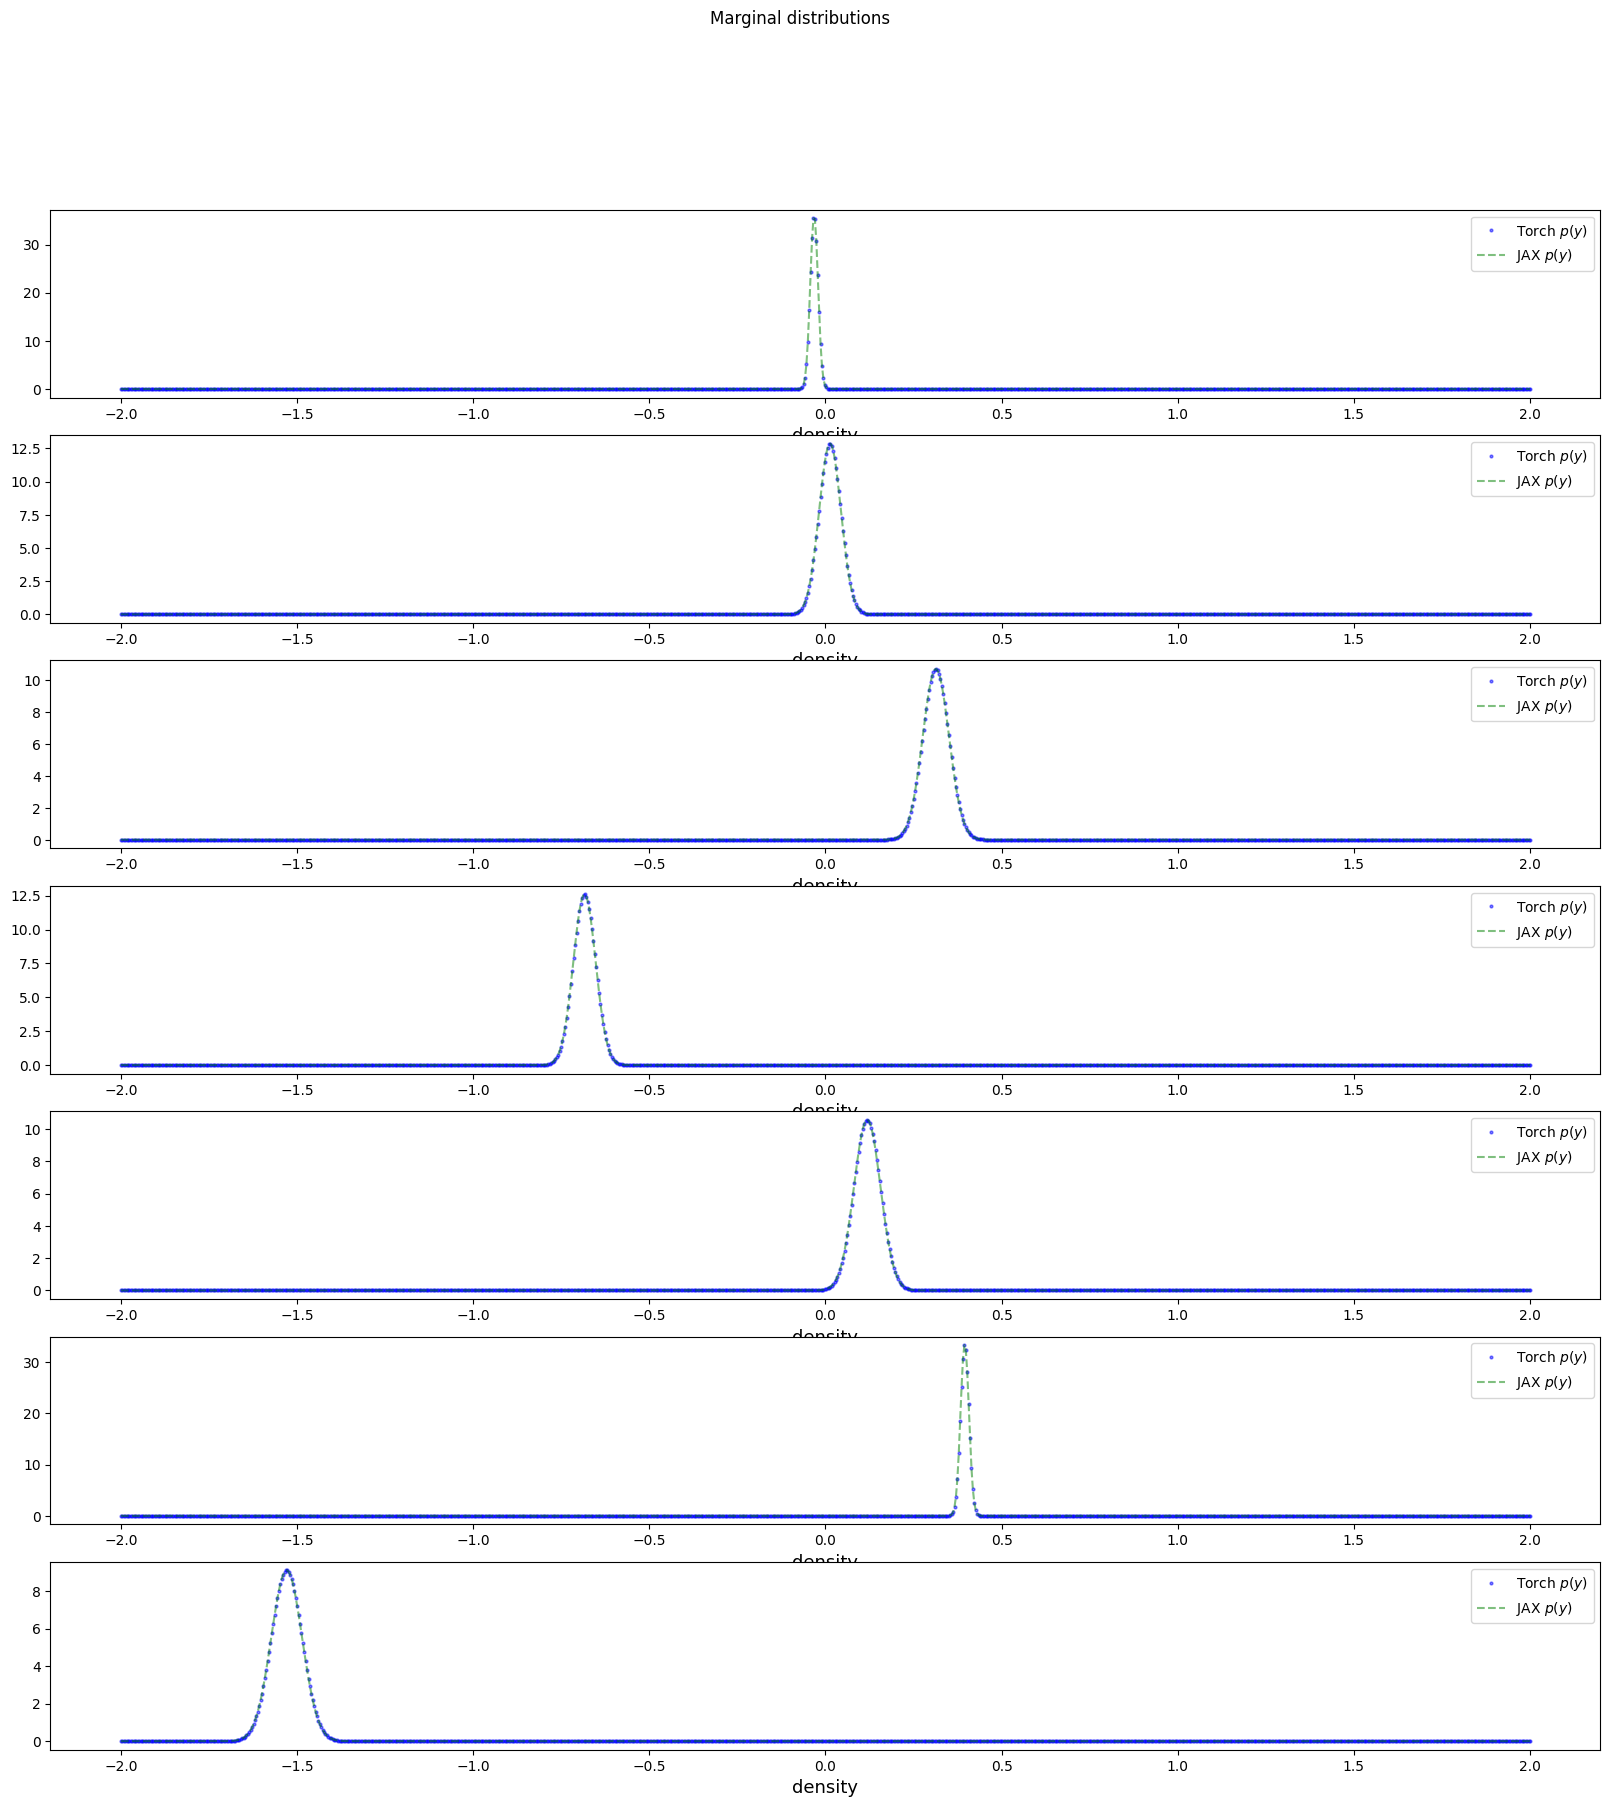

In [40]:
fig = plt.figure(figsize=(20, 20))
gs = matplotlib.gridspec.GridSpec(7, 1)
plt.suptitle('Marginal distributions')

mus_torch = torch_result.mean
sigmas_2_torch = torch_result.covariance_matrix

mus_jax = jax_result.mean
sigmas_2_jax = jax_result.covariance_matrix


for i in range(len(list(torch_result.loc))):
    mu_np = mus_torch[i].detach().numpy()
    sigma_np = sigmas_2_torch[i, i].detach().numpy()
    x = np.linspace(-2, 2, num=1000)
    px = univariate_normal(x, mu_np, sigma_np)
    
    ax = plt.subplot(gs[i])

    # Plot univariate distribution
    ax.plot(x, px, 'bo', label=f'Torch $p(y)$', markersize=2, alpha=0.5)
    ax.legend(loc=0)
    ax.set_xlabel('density', fontsize=13)
    
    mu_np = mus_jax[i]
    sigma_np = sigmas_2_jax[i, i]
    x = np.linspace(-2, 2, num=1000)
    px = univariate_normal(x, mu_np, sigma_np)
    
    ax = plt.subplot(gs[i])

    # Plot univariate distribution
    ax.plot(x, px, 'g--', label=f'JAX $p(y)$', markersize=2, alpha=0.5)
    ax.legend(loc=0)
    ax.set_xlabel('density', fontsize=13)